In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

In [2]:
import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.agents

In [3]:
t = np.linspace(0,np.pi,1000)
batt = np.sin(t)

In [4]:
param = {"threshold_hi": 0.8,
      "threshold_lo": 0.4,
      "val_hi": 0.9,
      "val_lo": 0.1}
agent = common.agents.schmitt(param)
conformity = []
for idx in range(len(batt)):
    conformity.append(agent.false_call(batt[idx]))

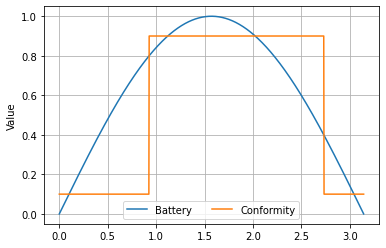

In [5]:
# Visualize how confirmity changes with battery value

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        # figsize=[fig_width,fig_height], # in inches
                        sharey=True)


axs.plot(t,batt, label="Battery")
axs.plot(t,conformity, label="Conformity")
axs.set_ylabel("Value")
# axs.xaxis.set_ticks([])
# axs.xaxis.set_ticklabels([])
axs.legend(loc="best",
           ncol=3,
           # fontsize='x-small',
           # bbox_to_anchor=(-0.02,1,1,1),
          )
axs.grid(True)
fig_tag = "plot-schmitt_char"
fig_filename = "../figures/" + fig_tag +".png"
fig.savefig(fig_filename, dpi=300, bbox_inches='tight', transparent=True)

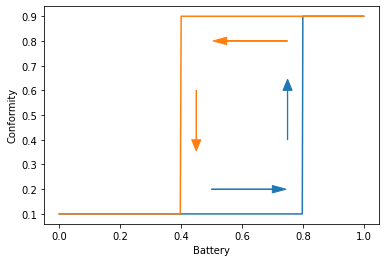

In [28]:
# Visualize the hysterisis
fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        # figsize=[fig_width,fig_height], # in inches
                        sharey=True)


idx = int(len(batt)/2)
axs.plot(batt[:idx],conformity[:idx]) # Up trigger
axs.plot(batt[idx:],conformity[idx:]) # Low trigger

axs.set_xlabel("Battery")
axs.set_ylabel("Conformity")

axs.arrow(0.50, 0.2,  0.2,    0, head_width = 0.03,color="tab:blue")
axs.arrow(0.75, 0.4,    0,  0.2, head_width = 0.03,color="tab:blue")
axs.arrow(0.75, 0.8, -0.2,    0, head_width = 0.03,color="tab:orange")
axs.arrow(0.45, 0.6,    0, -0.2, head_width = 0.03,color="tab:orange")